In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

In [43]:
df = pd.read_excel('/Users/majdshamashan/Desktop/Thesis/Philippinne_dataset.xlsx')
df.head()

,Region,Municipality/City,total_population_2020,total_population_2015,household_population_2020,number_households_2020,Lat,Lon,population_growth_rate_2015_2020
0,NATIONAL CAPITAL REGION (NCR),Manila,1846513,1780148,1837785,486293,14.590449,120.980362,3.728061
1,NATIONAL CAPITAL REGION (NCR),Mandaluyong,425758,386276,419333,116954,14.577439,121.033897,10.221189
2,NATIONAL CAPITAL REGION (NCR),Marikina,456059,450741,452961,104415,14.633108,121.099354,1.179835
3,NATIONAL CAPITAL REGION (NCR),Pasig,803159,755300,801439,212895,14.560517,121.076434,6.336423
4,NATIONAL CAPITAL REGION (NCR),Quezon,2960048,2936116,2950493,738724,14.651055,121.048625,0.815090


In [44]:
df = df.rename({'Region ': 'Region'}, axis=1)

In [45]:
def title_except_last(s):
    words = s.split()
    if len(words) <= 1:
        return s  # nothing to change
    return ' '.join(word.title() for word in words[:-1]) + ' ' + words[-1]

# Apply the function
df['Region'] = df['Region'].apply(title_except_last)



In [46]:
df.head()

,Region,Municipality/City,total_population_2020,total_population_2015,household_population_2020,number_households_2020,Lat,Lon,population_growth_rate_2015_2020
0,National Capital Region (NCR),Manila,1846513,1780148,1837785,486293,14.590449,120.980362,3.728061
1,National Capital Region (NCR),Mandaluyong,425758,386276,419333,116954,14.577439,121.033897,10.221189
2,National Capital Region (NCR),Marikina,456059,450741,452961,104415,14.633108,121.099354,1.179835
3,National Capital Region (NCR),Pasig,803159,755300,801439,212895,14.560517,121.076434,6.336423
4,National Capital Region (NCR),Quezon,2960048,2936116,2950493,738724,14.651055,121.048625,0.815090


In [53]:
df['Region'].unique()

array(['National Capital Region (NCR)',
       'Cordillera Administrative Region (CAR)', 'Ilocos (I)',
       'Cagayan Valley (II)', 'Central Luzon (III)', 'Calabarzon (IV-A)',
       'Mimaropa (IV-B)', 'Bicol Region (V)', 'Western Visayas (VI)',
       'Central Visayas (VII)', 'Eastern Visayas (VIII)',
       'Zamboanga Peninsula (IX)', 'Northern Mindanao (X)', 'Davao (XI)',
       'Soccsksargen (XII)', 'Caraga (XIII)',
       'Bangsamoro Autonomous REGION'], dtype=object)

In [65]:
df.groupby(by=['Region', 'Municipality/City'])['population_growth_rate_2015_2020'].sum().reset_index(name='growth_rate')

,Region,Municipality/City,growth_rate
0,Bangsamoro Autonomous REGION,Basilan,22.975426
1,Bangsamoro Autonomous REGION,Lanao del Sur,14.356690
2,Bangsamoro Autonomous REGION,Maguindanao,42.023267
3,Bangsamoro Autonomous REGION,Sulu,21.264752
4,Bangsamoro Autonomous REGION,Tawi-Tawi,12.684693
...,...,...,...
110,Zamboanga Peninsula (IX),Isabela,15.596517
111,Zamboanga Peninsula (IX),Zamboanga,13.394655
112,Zamboanga Peninsula (IX),Zamboanga Sibugay,5.798344
113,Zamboanga Peninsula (IX),Zamboanga del Norte,3.565577


In [77]:
mask = df[df['Region']=='Bangsamoro Autonomous REGION']

In [83]:
result = mask.groupby('Municipality/City')['population_growth_rate_2015_2020'].sum().reset_index(name='growth_rate')

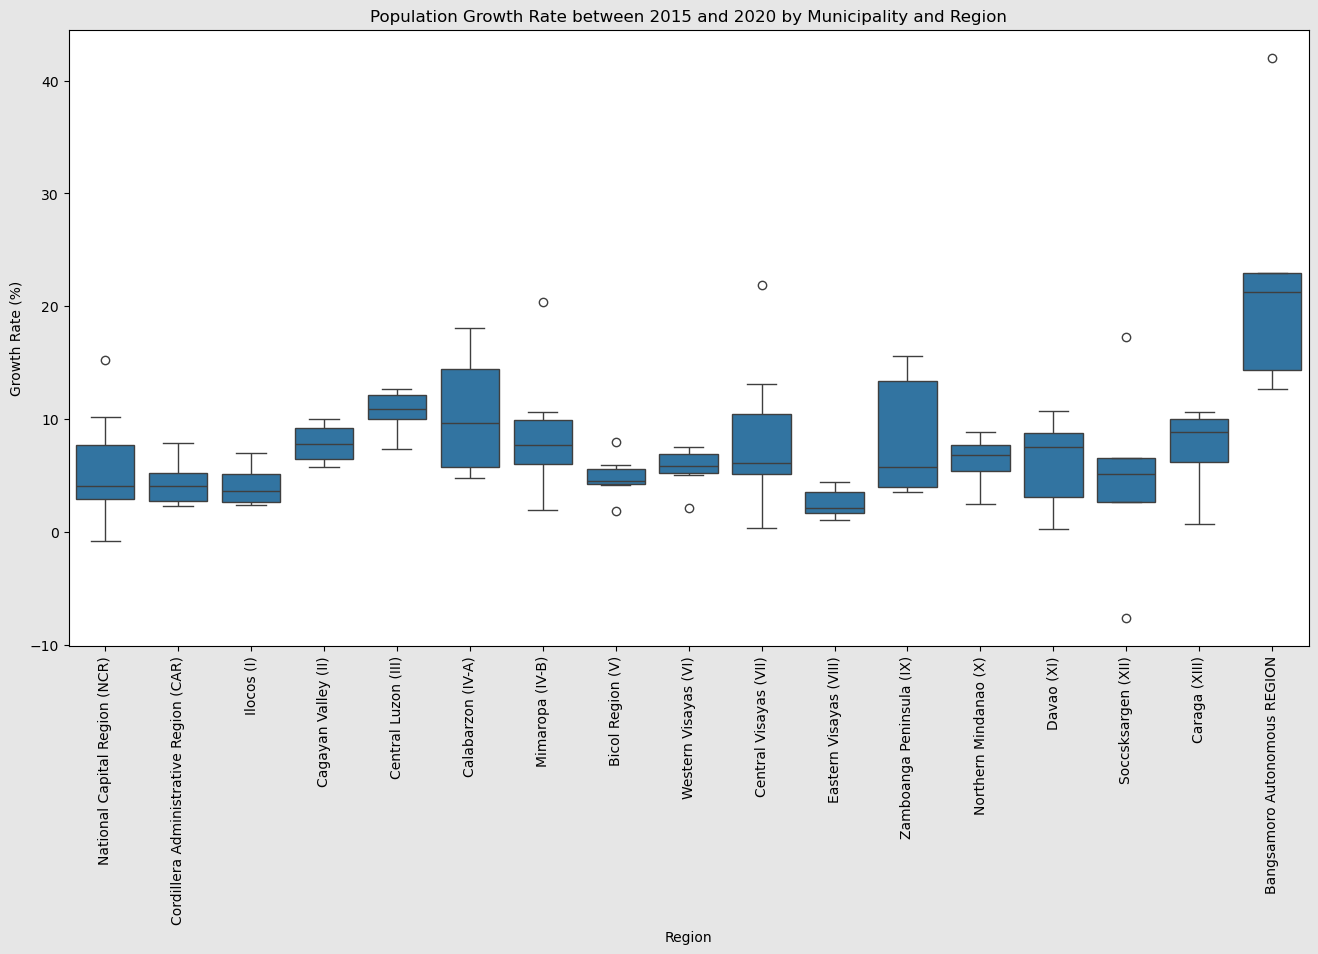

In [137]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df, x='Region', y='population_growth_rate_2015_2020')
plt.xticks(rotation=90)
plt.title("Population Growth Rate between 2015 and 2020 by Municipality and Region")
plt.ylabel('Growth Rate (%)')
ax.figure.set_facecolor('#e6e6e6')
plt.show()


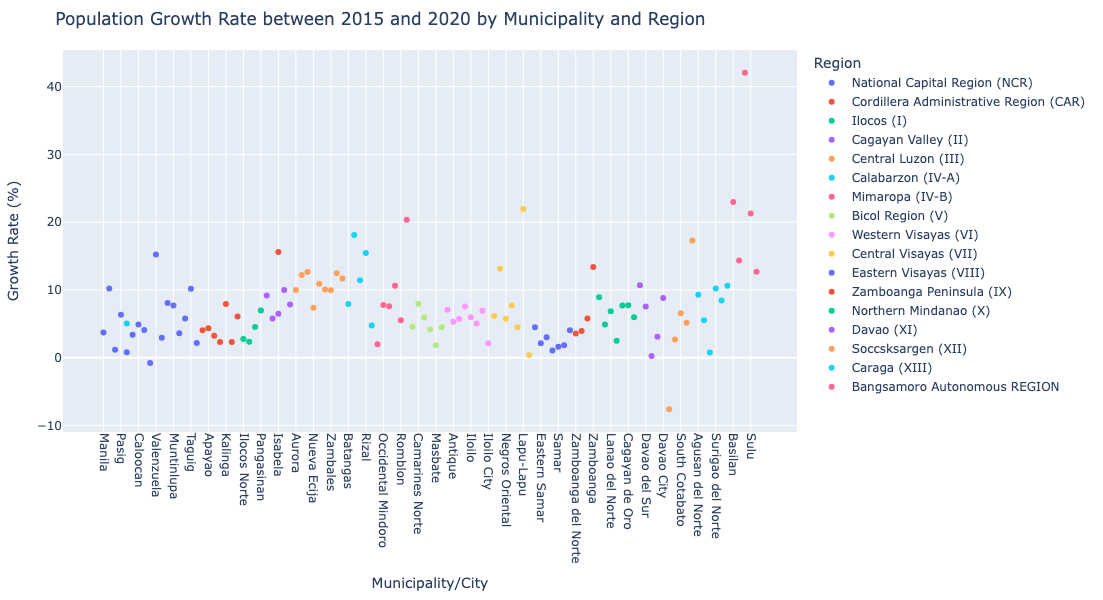

In [141]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Municipality/City',
    y='population_growth_rate_2015_2020',
    color='Region',
    hover_name='Municipality/City',  # shows full label on hover
    title='Population Growth Rate between 2015 and 2020 by Municipality and Region',
    labels={'population_growth_rate_2015_2020': 'Growth Rate (%)'},  # 👈 Rename y-axis here
    width=1200,
    height=600
)

fig.update_layout(
    xaxis_tickangle=90,
    margin=dict(l=20, r=20, t=50, b=150),
    showlegend=True
)
fig.show()


In [147]:
fig.write_html("/Users/majdshamashan/Desktop/Philippinne/Filipino_cities_PopGrowthRates.html")